In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
prescriptions = pd.read_csv('/Users/andresfelipeverdesaad/Documents/UT AI Masters/AI for Healthcare/MIMIC III Data/PRESCRIPTIONS.csv')
prescriptions.head()

/var/folders/sx/261s7rgj1fb69gnlh72rl9x80000gn/T/ipykernel_1008/2121836887.py:1: DtypeWarning:

Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.



,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,2214776,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Tacrolimus,Tacrolimus,Tacrolimus,TACR1,021796,469061711.0,1mg Capsule,2,mg,2,CAP,PO
1,2214775,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF5,006562,56017275.0,5mg Tablet,5,mg,1,TAB,PO
2,2215524,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,338055002.0,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV
3,2216265,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,BASE,D5W,NaN,NaN,HEPBASE,NaN,0.0,HEPARIN BASE,250,ml,250,ml,IV
4,2214773,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Furosemide,Furosemide,Furosemide,FURO20,008208,54829725.0,20mg Tablet,20,mg,1,TAB,PO


In [30]:
prescriptions['DRUG'].value_counts()

DRUG
Potassium Chloride      192993
Insulin                 143465
D5W                     142241
Furosemide              133122
0.9% Sodium Chloride    130147
                         ...  
Renaphro                     1
Morphine Sulfat              1
humulin R                    1
Meperidine PCA               1
rasagiline (Azilect)         1
Name: count, Length: 4525, dtype: int64

In [31]:

patients = pd.read_csv('/Users/andresfelipeverdesaad/Documents/UT AI Masters/AI for Healthcare/MIMIC III Data/PATIENTS.csv')
patients.head()



,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [32]:
from datetime import datetime

# Sample function to calculate age
def calculate_age(dob, dod):
    # Handle NaN or invalid dates
    if pd.isna(dob) or pd.isna(dod):
        return None  # or you could return a default age, like 0
    
    try:
        # Convert strings to datetime objects
        dob_date = datetime.strptime(dob, "%Y-%m-%d %H:%M:%S")
        dod_date = datetime.strptime(dod, "%Y-%m-%d %H:%M:%S")
    except ValueError:
        # If there's an error in date parsing, return None or handle it differently
        return None

    # Calculate age in years
    age = (dod_date - dob_date).days // 365
    return age

# Apply the function
patients["age"] = patients.apply(lambda row: calculate_age(row["DOB"], row["DOD"]), axis=1)

# Filter out patients with age >= 120 (optional)
patients = patients[patients["age"] < 120]

# Display first few rows
patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,age
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1,23.0
7,241,257,F,2031-04-03 00:00:00,2121-07-08 00:00:00,2121-07-08 00:00:00,2121-07-08 00:00:00,1,90.0
10,244,261,M,2025-08-04 00:00:00,2102-06-29 00:00:00,2102-06-29 00:00:00,2102-06-29 00:00:00,1,76.0
12,246,263,M,2104-06-18 00:00:00,2168-06-13 00:00:00,2168-06-13 00:00:00,NaN,1,64.0
17,251,268,F,2132-02-21 00:00:00,2198-02-18 00:00:00,2198-02-18 00:00:00,NaN,1,66.0


In [33]:
admissions = pd.read_csv('/Users/andresfelipeverdesaad/Documents/UT AI Masters/AI for Healthcare/MIMIC III Data/ADMISSIONS.csv')
admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [34]:
#Merge Admissions, Patients and Prescriptions
pre_merged = pd.merge(admissions, patients, on="SUBJECT_ID")
merged_data = pd.merge(pre_merged, prescriptions, on="SUBJECT_ID")  
merged_data.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID_x,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,26,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,...,Dofetilide,DOFE250,044360,6.958004e+07,250MCG CAP,250,mcg,1,CAP,PO
1,26,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,...,Isosorbide Mononitrate (Extended Release),IMDU60,017297,8.541100e+07,60mg ER tab,60,mg,1,TAB,PO
2,26,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,...,Enalapril Maleate,ENAL10,000384,5.107910e+10,10MG TAB,10,mg,1,TAB,PO
3,26,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,...,Metoprolol XL,TOPR50,016599,1.861090e+08,50mg XL Tab,50,mg,1,TAB,PO
4,26,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,...,Isosorbide Mononitrate (Extended Release),IMDU60,017297,8.541100e+07,60mg ER tab,60,mg,1,TAB,PO


In [35]:
merged_data.columns

Index(['ROW_ID_x', 'SUBJECT_ID', 'HADM_ID_x', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID_y', 'GENDER',
       'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'age', 'ROW_ID',
       'HADM_ID_y', 'ICUSTAY_ID', 'STARTDATE', 'ENDDATE', 'DRUG_TYPE', 'DRUG',
       'DRUG_NAME_POE', 'DRUG_NAME_GENERIC', 'FORMULARY_DRUG_CD', 'GSN', 'NDC',
       'PROD_STRENGTH', 'DOSE_VAL_RX', 'DOSE_UNIT_RX', 'FORM_VAL_DISP',
       'FORM_UNIT_DISP', 'ROUTE'],
      dtype='object')

In [36]:
merged_data = merged_data[['ROW_ID', 'SUBJECT_ID', 'HADM_ID_x', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS','GENDER','age',
       'HADM_ID_y', 'ICUSTAY_ID', 'STARTDATE', 'ENDDATE', 'DRUG_TYPE', 'DRUG',
       'DRUG_NAME_POE', 'DRUG_NAME_GENERIC', 'FORMULARY_DRUG_CD',
       'PROD_STRENGTH', 'DOSE_VAL_RX', 'DOSE_UNIT_RX', 'FORM_VAL_DISP',
       'FORM_UNIT_DISP', 'ROUTE']]
merged_data.head()

,ROW_ID,SUBJECT_ID,HADM_ID_x,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,1199775,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,...,Dofetilide,Dofetilide,Dofetilide,DOFE250,250MCG CAP,250,mcg,1,CAP,PO
1,1199768,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,...,Isosorbide Mononitrate (Extended Release),Isosorbide Mononitrate (Extended Release),Isosorbide Mononitrate (Extended Release),IMDU60,60mg ER tab,60,mg,1,TAB,PO
2,1199767,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,...,Enalapril Maleate,Enalapril Maleate,Enalapril Maleate,ENAL10,10MG TAB,10,mg,1,TAB,PO
3,1199774,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,...,Metoprolol XL,Metoprolol XL,Metoprolol XL,TOPR50,50mg XL Tab,50,mg,1,TAB,PO
4,1199784,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,...,Isosorbide Mononitrate (Extended Release),Isosorbide Mononitrate (Extended Release),Isosorbide Mononitrate (Extended Release),IMDU60,60mg ER tab,60,mg,1,TAB,PO


In [37]:
# Group by 'Admission_Type' and 'Drug' and count occurrences
grouped = merged_data.groupby(['GENDER', 'DRUG'])['SUBJECT_ID'].nunique().reset_index(name='distinct_subject_count')

# Get the top 3 most used drugs for each admission type
top_10_drugs = grouped.groupby('GENDER').apply(lambda x: x.nlargest(10, 'distinct_subject_count')).reset_index(drop=True)

# Display the result
top_10_drugs

/var/folders/sx/261s7rgj1fb69gnlh72rl9x80000gn/T/ipykernel_1008/2066566292.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,GENDER,DRUG,distinct_subject_count
0,F,Potassium Chloride,4536
1,F,Acetaminophen,4423
2,F,Magnesium Sulfate,4223
3,F,Sodium Chloride 0.9% Flush,4181
4,F,Insulin,4081
5,F,Heparin,4047
6,F,D5W,3987
7,F,NS,3951
8,F,Iso-Osmotic Dextrose,3822
9,F,Morphine Sulfate,3636


/var/folders/sx/261s7rgj1fb69gnlh72rl9x80000gn/T/ipykernel_1008/485549879.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/sx/261s7rgj1fb69gnlh72rl9x80000gn/T/ipykernel_1008/485549879.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




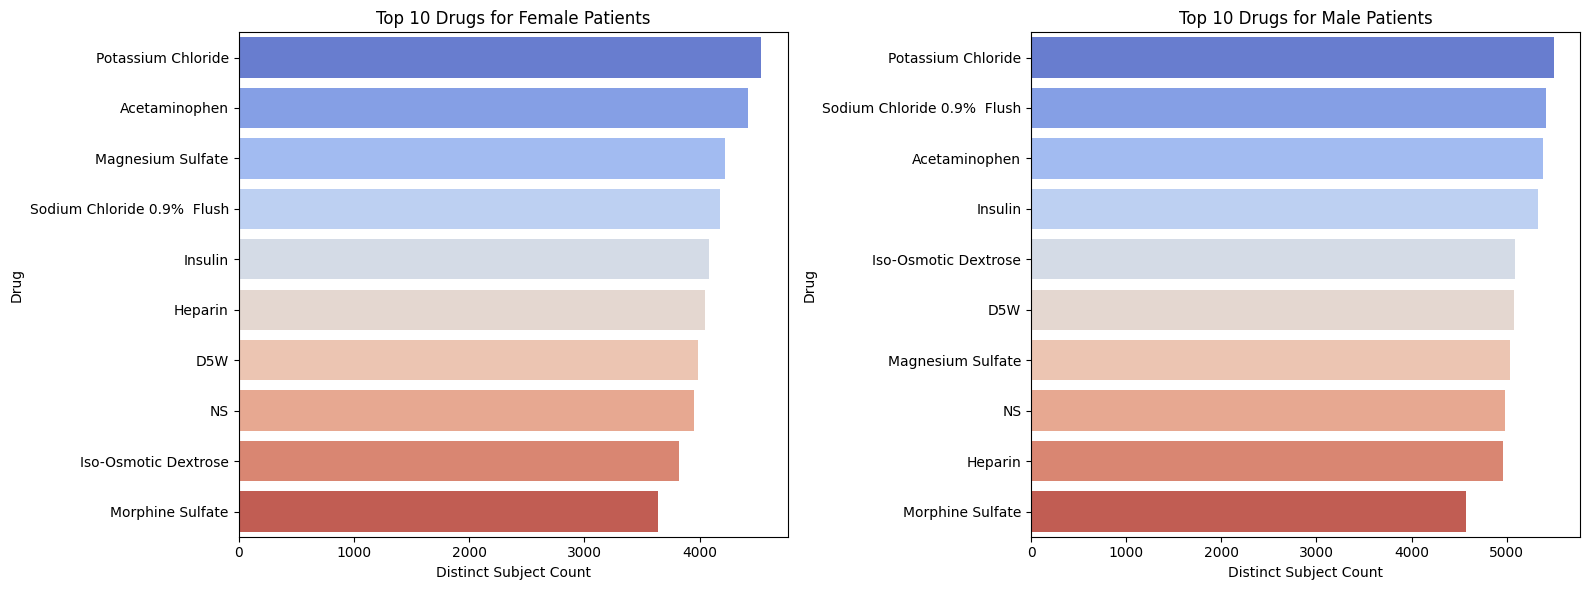

In [38]:
# Create two separate dataframes, one for each gender
df_female = top_10_drugs[top_10_drugs['GENDER'] == 'F']
df_male = top_10_drugs[top_10_drugs['GENDER'] == 'M']

# Set up the figure for plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Female bar chart
sns.barplot(x='distinct_subject_count', y='DRUG', data=df_female, ax=axes[0], palette='coolwarm')
axes[0].set_title('Top 10 Drugs for Female Patients')
axes[0].set_xlabel('Distinct Subject Count')
axes[0].set_ylabel('Drug')

# Male bar chart
sns.barplot(x='distinct_subject_count', y='DRUG', data=df_male, ax=axes[1], palette='coolwarm')
axes[1].set_title('Top 10 Drugs for Male Patients')
axes[1].set_xlabel('Distinct Subject Count')
axes[1].set_ylabel('Drug')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [39]:
# Group by 'Admission_Type' and 'Drug' and count occurrences
grouped = merged_data.groupby(['ADMISSION_TYPE'])['SUBJECT_ID'].nunique().reset_index(name='distinct_subject_count')
grouped

,ADMISSION_TYPE,distinct_subject_count
0,ELECTIVE,1779
1,EMERGENCY,11564
2,NEWBORN,46
3,URGENT,362


In [40]:
#Create dataset of prescriptions per patient. 
prescriptions_per_patient = merged_data.groupby(['SUBJECT_ID','RELIGION','GENDER','ADMISSION_TYPE'])['DRUG'].nunique().reset_index(name='num_prescriptions')
prescriptions_per_patient 

,SUBJECT_ID,RELIGION,GENDER,ADMISSION_TYPE,num_prescriptions
0,9,UNOBTAINABLE,M,EMERGENCY,28
1,11,OTHER,F,EMERGENCY,44
2,12,JEWISH,M,ELECTIVE,37
3,21,JEWISH,M,EMERGENCY,76
4,26,CATHOLIC,M,EMERGENCY,30
...,...,...,...,...,...
13776,99937,CATHOLIC,F,EMERGENCY,31
13777,99944,CATHOLIC,F,EMERGENCY,42
13778,99955,CATHOLIC,M,EMERGENCY,32
13779,99982,CATHOLIC,M,EMERGENCY,68


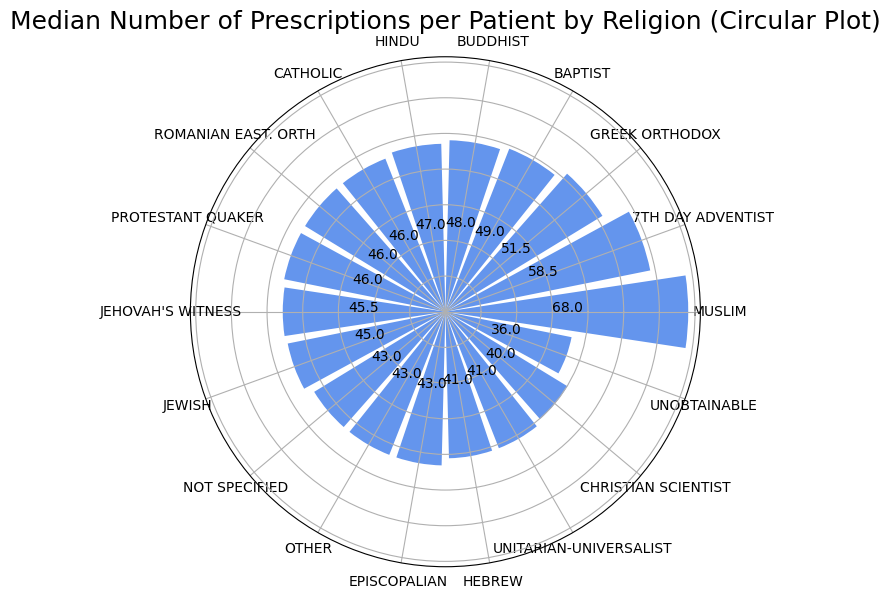

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Calculate median number of prescriptions per patient for each religion
avg_prescriptions_by_religion = prescriptions_per_patient.groupby('RELIGION')['num_prescriptions'].median().reset_index()

# Sort data by the median number of prescriptions in descending order
df_sorted = avg_prescriptions_by_religion.sort_values('num_prescriptions', ascending=False)

# Number of bars (religions)
num_bars = len(df_sorted)

# Create a circular bar plot with a smaller size
angles = np.linspace(0, 2 * np.pi, num_bars, endpoint=False).tolist()

# Set figure size
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={'projection': 'polar'})  # Reduced from (8, 8) to (7, 7)

# Plotting the bars with smaller inner circle (reduce `bottom`)
bars = ax.bar(angles, df_sorted['num_prescriptions'], width=0.3, bottom=0.1, color='cornflowerblue')  # Lower bottom value for smaller circle

# Set the angle and labels for the religions at the bottom (on the circular axis)
ax.set_xticks(angles)
ax.set_xticklabels(df_sorted['RELIGION'], fontsize=10, color='black')

# Add labels in the middle of the bars for the number of prescriptions
for i, bar in enumerate(bars):
    # Calculate the correct position for the label: angle + bar width / 2
    angle = bar.get_x() + bar.get_width() / 2
    height = bar.get_height() / 2 + 0.1  # Adjust the height to position the label in the middle of the bar
    
    # Add the prescription value at the middle of each bar
    ax.text(angle, height, f'{df_sorted["num_prescriptions"].iloc[i]:.1f}', 
            horizontalalignment='center', fontsize=10, color='black')

# Remove the radial axis labels
ax.set_yticklabels([])

# Title with a bigger font size
ax.set_title('Median Number of Prescriptions per Patient by Religion (Circular Plot)', fontsize=18, pad=20)

# Adjust layout to make sure title doesn't overlap
plt.tight_layout()

# Show the plot
plt.show()

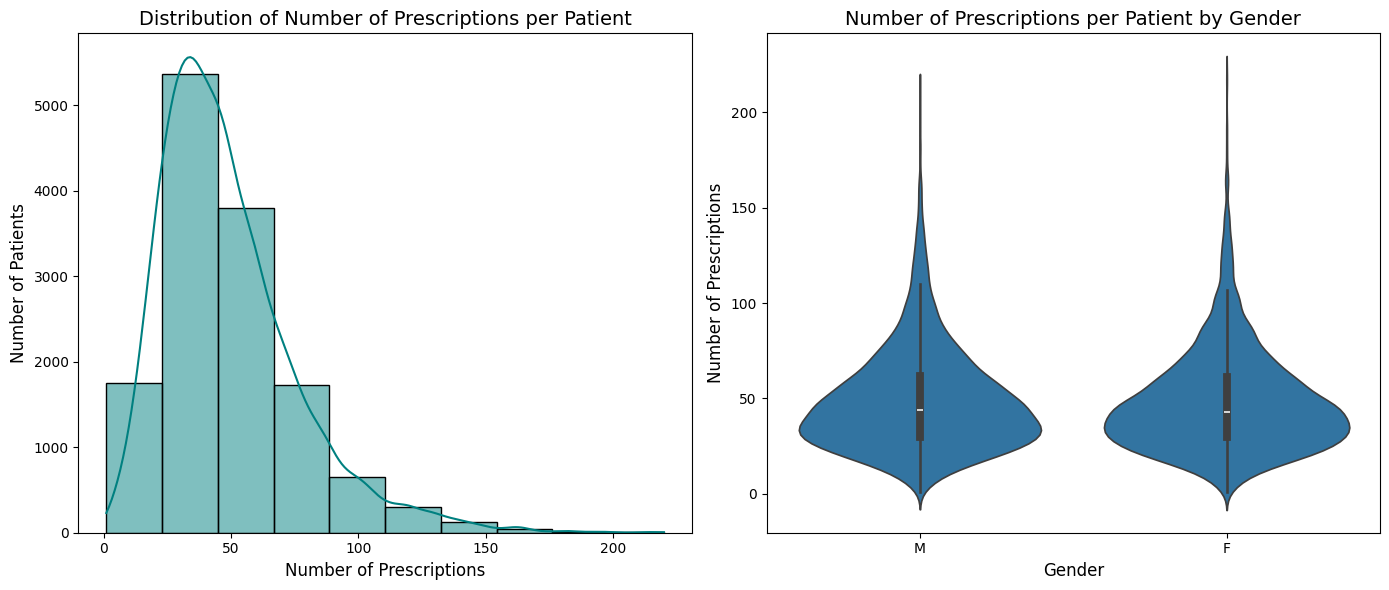

In [42]:
# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(14, 6))  # Increase width for better spacing between plots

# First subplot - Histogram of number of prescriptions per patient
plt.subplot(1, 2, 1)
sns.histplot(data=prescriptions_per_patient, x='num_prescriptions', bins=10, kde=True, color='teal')
plt.title('Distribution of Number of Prescriptions per Patient', fontsize=14)
plt.xlabel('Number of Prescriptions', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Second subplot - Gender distribution within each age bin
plt.subplot(1, 2, 2)
sns.violinplot(data=prescriptions_per_patient, x='GENDER', y='num_prescriptions', inner='box')
plt.title("Number of Prescriptions per Patient by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Prescriptions", fontsize=12)

# Adjust layout to ensure there is no overlap between plots
plt.tight_layout()

# Show the plot
plt.show()

In [43]:
import plotly.express as px
import pandas as pd

# Create the box plot with Plotly
fig = px.box(
    prescriptions_per_patient,
    x="ADMISSION_TYPE",          # Categorical variable for the x-axis
    y="num_prescriptions",       # Numeric variable for the y-axis
    color="GENDER",              # Group by 'GENDER' and color the box plots accordingly
    title="Number of Drug Prescriptions per Patient by Admission Type and Gender",  # Plot title
    labels={"ADMISSION_TYPE": "Admission Type", "num_prescriptions": "Number of Prescriptions"}  # Axis labels
)

# Customize layout
fig.update_layout(
    xaxis_title="Admission Type",
    yaxis_title="Number of Prescriptions",
    xaxis_tickangle=-45,  # Rotate the x-axis labels for better readability
    title_x=0.5,          # Center the title horizontally
)

# Show the plot
fig.show()

In [44]:
fig = px.box(
    prescriptions_per_patient, 
    x="ADMISSION_TYPE",                # Group by gender
    y="num_prescriptions",             # Color by gender
    title="Number of Prescriptions per Patient by Admission Type",  # Title
    labels={"GENDER": "Gender", "num_prescriptions": "Number of Prescriptions"}  # Axis labels
)

fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Number of Prescriptions",
    xaxis_tickangle=-45,  # Rotate the x-axis labels for better readability
    title_x=0.5,          # Center the title horizontally
)

fig.show()

In [45]:
import plotly.graph_objects as go

# Filter the data for female and male
female_data = pre_merged[pre_merged['GENDER'] == 'F']
male_data = pre_merged[pre_merged['GENDER'] == 'M']

# Count the occurrences of each insurance type for females and males
female_insurance_counts = female_data['INSURANCE'].value_counts()
male_insurance_counts = male_data['INSURANCE'].value_counts()

# Create pie chart for Female Insurance Breakdown
female_fig = go.Figure(go.Pie(
    labels=female_insurance_counts.index,
    values=female_insurance_counts.values,
    hoverinfo='label+percent',
    textinfo='label+percent',
    marker=dict(colors=['#983D3D', '#232066', '#DCB732', '#66CDAA', '#FFD700'])
))
female_fig.update_layout(
    title='Female Insurance Breakdown',
    showlegend=True,
    height=400,  # Set equal height and width for square shape
    width=400,
    margin=dict(t=40, b=40, l=40, r=40)  # Adjust margins to fit square shape
)

# Create pie chart for Male Insurance Breakdown
male_fig = go.Figure(go.Pie(
    labels=male_insurance_counts.index,
    values=male_insurance_counts.values,
    hoverinfo='label+percent',
    textinfo='label+percent',
    marker=dict(colors=['#983D3D', '#232066', '#DCB732', '#66CDAA', '#FFD700'])
))
male_fig.update_layout(
    title='Male Insurance Breakdown',
    showlegend=True,
    height=400,  # Set equal height and width for square shape
    width=400,
    margin=dict(t=40, b=40, l=40, r=40)  # Adjust margins to fit square shape
)

# Show both pie charts
female_fig.show()
male_fig.show()

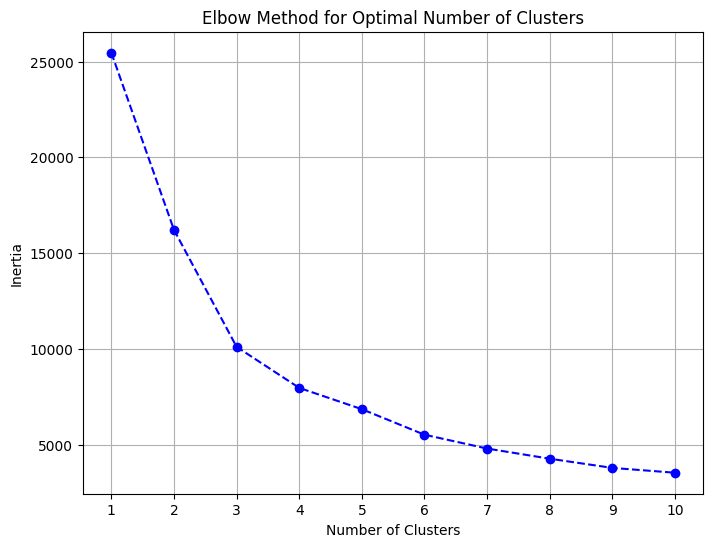

In [46]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Let's assume merged_data is already loaded
# We are interested in the 'age' and 'DRUG' features

# Preprocess the data
df_cluster = merged_data.groupby('SUBJECT_ID').agg(
    num_drugs=('DRUG', 'nunique'),    # Count unique drugs per patient
    age=('age', 'mean')                # Take the mean age (if there are multiple records for a patient)
).reset_index()

# Handle missing values
df_cluster = df_cluster.dropna(subset=['age', 'num_drugs'])
df_cluster = df_cluster[df_cluster['age'] > 0]


# Normalize the data (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[['age', 'num_drugs']])

# Calculate the inertia for a range of cluster numbers
inertia = []
k_range = range(1, 11)  # We'll test for clusters from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow chart
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='b', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()



In [47]:
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose 3 clusters (you can adjust this)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Create the scatter plot with Plotly
fig = px.scatter(
    df_cluster, 
    x='age', 
    y='num_drugs', 
    color='Cluster', 
    title='K-means Clustering of Patients Based on Age and Number of Drugs',
    labels={'age': 'Age', 'num_drugs': 'Number of Unique Drugs'},
    color_continuous_scale='viridis',  # Use 'viridis' color scale
)

# Customize layout
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Number of Unique Drugs',
    legend_title="Clusters",
    legend=dict(title="Clusters", tracegroupgap=0),
    title_x=0.5,  # Center the title
)

# Show the interactive plot
fig.show()